# Midterm 2

# Time Limit - 2.30 pm to 6.30 pm

# 20 + 20 - 40 Marks

### Instructions

- The exam must be submitted on D2L by 6.30pm. No exceptions here. Only a single .ipynb file

- Most Important - Your submitted code should not match a code from the internet. If it does, it is a straight 0.

- The grades for Midterm1 and Midterm2, both will be considered and i will average out the grades.

- You must submit individually You will be liable for penalties if your work matches exactly the other person in your class or from the internet. So be careful.

## Problem 1
### The relevant Dataset (CIFAR 100) have been described below.




This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly.

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/

### CIFAR-100 Image label detection of provided images

### Choose PCA+Random Forest+XGBoost And apply the techniques to the CIFAR-100 Dataset to Classify the Images.

### Apply PCA for reducing Dimensions. [5 Marks]
### Apply Random Forest with AdaBoost for model creation. [5 Marks].
### Recall or Precision Value? Which one should be optimised?? Show your optimised confusion matrix. [5 Marks]

### Download the 4 images provided on D2L. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above. [5 Marks]

In [ ]:
import keras
from keras.datasets import cifar100

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

Loading the data from Keras. Since the data is 32x32 in color, we have to reshape the array to 32*32*3 = 3,072 features.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'coarse') # to get the 20 super classes

In [ ]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [ ]:
y_test

array([[10],
       [10],
       [ 0],
       ...,
       [ 4],
       [ 8],
       [ 2]])

Additionally, we normalize the images to 0-1 range by dividing by 255(because the pixels range from 0-255).

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
y_train.ravel().shape

(50000,)

In [ ]:
# performing PCA
pca = PCA(.95)

In [ ]:
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
pca.n_components_

202

We need 202 principal components to retain 95% of the information/variance in the data.

In [ ]:
X_img_train = pca.transform(X_train)
X_img_test = pca.transform(X_test)

Performing XGBoost Classifier



In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import recall_score


In [ ]:
xg_cl = xgb.XGBClassifier(objective = 'multi:softmax', n_estimators=10, 
                          random_state = 101, 
                          early_stopping_rounds = 10) #early_stopping_rounds to stop once the model is not improving for 10 iterations

In [ ]:
xg_cl.fit(X_img_train,y_train.ravel())

XGBClassifier(early_stopping_rounds=10, n_estimators=10,
              objective='multi:softprob', random_state=101)

In [ ]:
pred = xg_cl.predict(X_img_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.27      0.28      0.27       500
           1       0.29      0.20      0.24       500
           2       0.29      0.47      0.36       500
           3       0.29      0.18      0.22       500
           4       0.27      0.37      0.31       500
           5       0.20      0.17      0.19       500
           6       0.18      0.17      0.17       500
           7       0.23      0.45      0.30       500
           8       0.12      0.16      0.14       500
           9       0.24      0.35      0.28       500
          10       0.31      0.37      0.34       500
          11       0.10      0.11      0.11       500
          12       0.15      0.22      0.18       500
          13       0.19      0.04      0.06       500
          14       0.22      0.21      0.21       500
          15       0.10      0.02      0.03       500
          16       0.09      0.06      0.07       500
          17       0.33    

In [ ]:
# ada_cl = AdaBoostClassifier(base_estimator = rand_forest, n_estimators=50, learning_rate=0.5)
# model = ada_cl.fit(X_img_train,y_train.ravel())

In this multiclassification problem, the precision-recall tradeoff is different than before with binary classification. Precision and recall must be looked at for each different class. So if what we're looking for is the model to correctly identify a class, we want to have higher recall for that specific class, as this means that from actual television images (for example), the model is going to identify a higher proportion as television. 

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.preprocessing import image

In [ ]:
import numpy as np

In [ ]:
img_arr = np.empty((0,3072))
imgs = ['camel.jpg','television.jpg','truck.jpg', 'wardrobe.jpg']
for img in imgs:
  img = image.load_img(img, target_size=(32,32))
  x = image.img_to_array(img).reshape(1,3072)
  img_arr = np.append(img_arr, x, axis=0)

In [ ]:
img_arr

array([[232., 232., 230., ..., 139.,  87.,  47.],
       [  6., 192., 243., ..., 255., 255., 255.],
       [ 94., 133., 172., ..., 137., 118.,  88.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [ ]:
# normalizing
img_arr = img_arr / 255
img_arr

array([[0.90980392, 0.90980392, 0.90196078, ..., 0.54509804, 0.34117647,
        0.18431373],
       [0.02352941, 0.75294118, 0.95294118, ..., 1.        , 1.        ,
        1.        ],
       [0.36862745, 0.52156863, 0.6745098 , ..., 0.5372549 , 0.4627451 ,
        0.34509804],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# applying PCA
test_img = pca.transform(img_arr)

In [ ]:
xg_cl.predict(test_img)

array([ 4,  6, 19,  5])

## Problem 2

## Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. The relevant CSV file have been attached in D2L.

## A sample .ipynb work file for this problem have been provided with spam.csv file (File used in Class). This file contains code for TF-IDF along with Gensim LDA package to find latent topics for the tweets (Topic Modelling). 

## Top of the code file contains relevent references for the code, please go through them. Few things are missing in the code that you need to apply to complete it.

### 1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]
### 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]
### 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]
### 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]
### 5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]


## Columns:
## 1) Location
## 2) Tweet At
## 3) Original Tweet
## 4) Sentiment (To be predicted)

In [ ]:
tweet = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin-1')

In [ ]:
tweet

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
import gensim
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyramelenciano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing punctuations, stopwords and short words

In [ ]:
tweet_corpus = []
tweet_wc = []
for row in range(len(tweet)):
  # removing punctuations
  no_punc = [w for w in tweet.iloc[row]['OriginalTweet'] if w not in string.punctuation]
  text = ''.join(no_punc)  
  # removing stopwords
  no_stopw = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  no_sm_w = [word for word in no_stopw if len(word)>2]
  # removing words of length 1 and 2, lowercasing and deaccentuating
  tweet_corpus.append(no_sm_w)
  tweet_wc += no_sm_w

Wordcloud

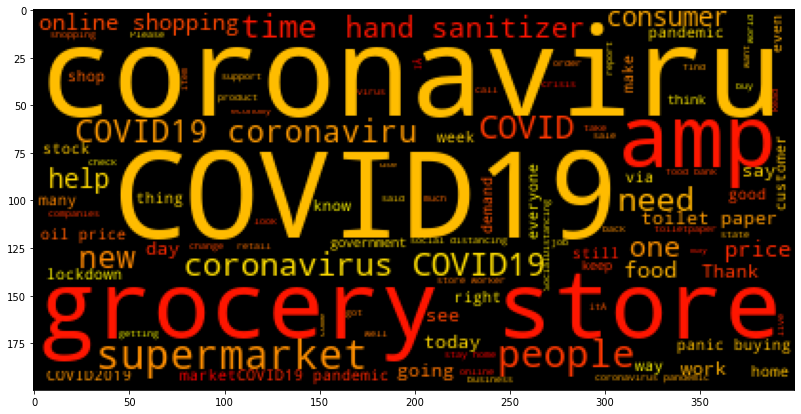

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wc = WordCloud(
    colormap = 'autumn',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(tweet_wc))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [ ]:
from gensim import corpora
# creating dictionary of tokens
dictionary = corpora.Dictionary(tweet_corpus)
print(dictionary)

Dictionary(99204 unique tokens: ['Chrisitv', 'MeNyrbie', 'PhilGahan', 'httpstcoI2NlzdxNo8', 'httpstcoiFz9FAn2Pa']...)


In [ ]:
bow_corpus = [dictionary.doc2bow(text) for text in tweet_corpus] # bag of words

In [ ]:
!pip install pyLDAvis

import pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 22.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=855fc07e7d16087cb2e10fe8e422406ff41467e366df4956d7ded2def1e2d539
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from gensim import models
import pyLDAvis.gensim_models as gensimvis

In [ ]:
tfidf_mod = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_mod[bow_corpus]

In [ ]:
## LDA Model
lda = models.LdaMulticore(tfidf_corpus, num_topics = 20, id2word = dictionary,
                      passes = 2,
                      workers = 2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, tfidf_corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.229261  0.054969       1        1  21.282931
3      0.093222 -0.160295       2        1   7.305170
12     0.100081  0.029711       3        1   6.931548
1      0.093252  0.024192       4        1   6.096878
18     0.022249 -0.056060       5        1   4.860363
16     0.010132 -0.006769       6        1   4.335252
19     0.012163 -0.006469       7        1   4.304429
9     -0.008243  0.021157       8        1   4.052598
10     0.003876  0.030489       9        1   4.004024
7     -0.005281  0.025889      10        1   3.934271
13    -0.022978 -0.006041      11        1   3.774576
5     -0.036179 -0.039245      12        1   3.757164
2     -0.030302  0.036002      13        1   3.625018
0     -0.029372  0.014749      14        1   3.619759
8     -0.032761  0.038086      15        1   3.301008
4     -0.051660 -0.000889      16        1   3.210144
6     -0.069631 -0.004808      17        1   3.059215
17    -0.096270 -0.005629      18        1   2.927062
15    -0.085298  0.004066      19        1   2.903939
14    -0.096262  0.006895      20        1   2.714649, topic_info=              Term        Freq       Total Category  logprob  loglift
12797       Easter   24.000000   24.000000  Default  30.0000  30.0000
13646    Sanitizer   47.000000   47.000000  Default  29.0000  29.0000
3043           oil  135.000000  135.000000  Default  28.0000  28.0000
11189       output   28.000000   28.000000  Default  27.0000  27.0000
13644         Hand   46.000000   46.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
223       Consumer    4.981495  119.070963  Topic20  -6.7528   0.4325
51     coronavirus    5.663459  344.987550  Topic20  -6.6245  -0.5030
31     Coronavirus    4.737256  178.689913  Topic20  -6.8031  -0.0237
117        covid19    4.290287  159.592206  Topic20  -6.9022  -0.0098
102        Covid19    4.189394  232.976129  Topic20  -6.9260  -0.4119

[1369 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
5390       3  0.124607    000
5390       6  0.083072    000
5390       7  0.332287    000
5390       9  0.166143    000
5390      10  0.124607    000
...      ...       ...    ...
12798      2  0.789310  write
17072      7  0.861513  wrote
26279     20  0.981437  wuhan
2586       1  0.924146  youve
88690     13  0.840975   ÂIt

[3314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 13, 2, 19, 17, 20, 10, 11, 8, 14, 6, 3, 1, 9, 5, 7, 18, 16, 15])

Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.

In [ ]:
len(tfidf_corpus)

41157

In [ ]:
from gensim import matutils

In [ ]:
#transforming bow corpus to tfidf vector
X_tfidf_vector = gensim.interfaces.TransformedCorpus(tfidf_mod, bow_corpus)

In [ ]:
X_tfidf = matutils.corpus2csc(X_tfidf_vector)

In [ ]:
X_features = pd.DataFrame(X_tfidf.toarray()).transpose()

In [ ]:
X_features

,0,1,2,3,4,5,6,7,8,9,...,99194,99195,99196,99197,99198,99199,99200,99201,99202,99203
0,0.372169,0.415088,0.415088,0.415088,0.415088,0.415088,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223256,0.194222,0.207745,0.147017,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.572548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.396261,0.396261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.497546,0.497546,0.000000,0.000000,0.000000,0.000000
41155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


For the classification model, we'll remove the features username and screenname, because they add no information. we'll also drop the location because it has many missing values. (I tried doing PCA to remove features but it kept crashing, so I removed it).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_features, 
                                                    tweet['Sentiment'], 
                                                    test_size=0.20, 
                                                    random_state=101)

In [ ]:
# pca = PCA(.95)
# pca.fit(X_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_f = RandomForestClassifier(n_estimators=10, random_state = 101)
rand_f.fit(X_train, y_train)

In [ ]:
y_pred = rand_f.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
c